# Example of Gradient Descent

在這個示例中，使用 二維空間 及 三維空間 的方程式，來演示如何用 梯度下降 法，求得 local minimum.

## Example in $ \mathcal{R}^2 $ space

Target function:

$
f(x) = \frac{\sin(x)}{x}
\\
f'(x) = \frac{\cos(x)}{x} - \frac{\sin(x)}{x^2}
$

iter( 0), approaching: ( 0.74,  0.91)
iter( 1), approaching: ( 1.10,  0.81)
iter( 2), approaching: ( 1.58,  0.63)
iter( 3), approaching: ( 2.19,  0.37)
iter( 4), approaching: ( 2.84,  0.10)
iter( 5), approaching: ( 3.40, -0.08)
iter( 6), approaching: ( 3.79, -0.16)
iter( 7), approaching: ( 4.05, -0.19)


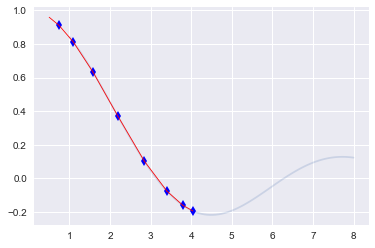

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

def fx(x):
    return np.sin(x)/x

def fx_deriv(x):
    return (np.cos(x) / x - np.sin(x) / np.power(x,2))

x = np.linspace(1.,8.,100)
y = np.sin(x)/x

g = plt.plot(x,y,alpha=.2)

vx1 = .5
eta = 1.5
for i in range(8):
    vy1 = fx(vx1)
    gx1 = fx_deriv(vx1)
    d = gx1 * eta
    vx2 = vx1 - d
    vy2 = fx(vx2)
    plt.plot(vx2, vy2, 'bd')
    plt.plot([vx1, vx2], [vy1, vy2], 'r-', linewidth=.8)
    print('iter(%2d), approaching: (%5.2f, %5.2f)' % (i, vx2, vy2))
    vx1 = vx2
    
plt.show();

## Example in $ \mathcal{R}^3 $ space

Target function:

$
\begin{align}
f(x,y) & = \frac{10}{6} \Big( & \sin\big(\frac{x}{3}\big) + 2 \sin\big(\frac{x}{1.7}\big) + 2 \sin\big(\frac{y}{2}\big) + \sin\big(x+\frac{y}{1.3}\big) & \Big)
\\
\frac{\partial}{\partial x} f(x,y) & = \frac{10}{6} \Big( &\cos\big(\frac{x}{3}\big) / 3 + 2 \cos\big(\frac{x}{1.7}\big) + \cos\big(x + \frac{y}{1.3}\big) & \Big)
\\
\frac{\partial}{\partial y} f(x,y) & = \frac{10}{6} \Big( &\cos\big(\frac{y}{2}\big) + \cos\big(x + \frac{y}{1.3}\big) / 1.3 & \Big)
\end{align}
$

iter( 0), approaching (x1, x2, y): (-8.44,  2.41,  5.31)
iter( 1), approaching (x1, x2, y): (-9.22,  1.50,  3.05)
iter( 2), approaching (x1, x2, y): (-9.40,  1.02,  2.69)
iter( 3), approaching (x1, x2, y): (-9.27,  0.74,  2.47)
iter( 4), approaching (x1, x2, y): (-9.02,  0.44,  2.14)
iter( 5), approaching (x1, x2, y): (-8.68,  0.10,  1.62)
iter( 6), approaching (x1, x2, y): (-8.22, -0.29,  0.79)
iter( 7), approaching (x1, x2, y): (-7.62, -0.76, -0.50)
iter( 8), approaching (x1, x2, y): (-6.88, -1.31, -2.33)
iter( 9), approaching (x1, x2, y): (-6.06, -1.95, -4.48)
iter(10), approaching (x1, x2, y): (-5.29, -2.60, -6.36)
iter(11), approaching (x1, x2, y): (-4.70, -3.17, -7.48)
iter(12), approaching (x1, x2, y): (-4.34, -3.58, -7.97)
iter(13), approaching (x1, x2, y): (-4.13, -3.84, -8.14)
iter(14), approaching (x1, x2, y): (-4.02, -4.00, -8.20)
iter(15), approaching (x1, x2, y): (-3.96, -4.09, -8.22)
iter(16), approaching (x1, x2, y): (-3.92, -4.15, -8.23)
iter(17), approaching (x1, x2, 

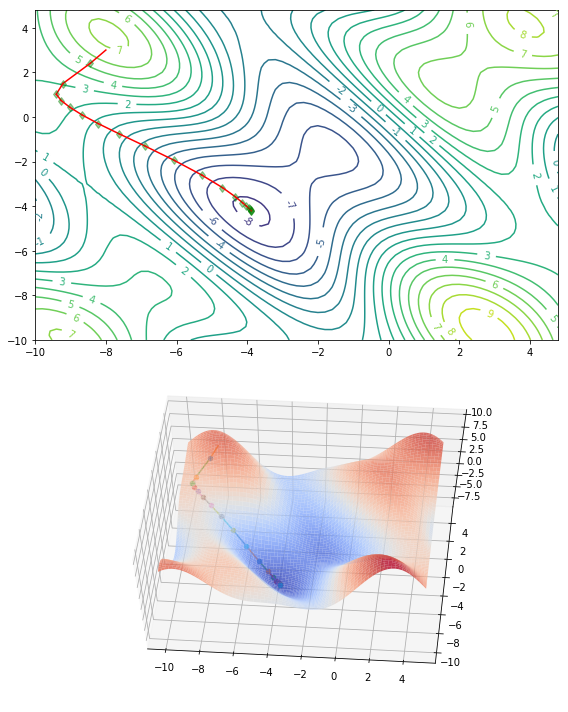

In [2]:

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    z = np.sin(x/3) + np.sin(x/1.7) * 2 + np.sin(y/2) * 2 + np.sin(x+y/1.3)
    z = z / 6. * 10.
    return z

def f_dx(x, y):
    gx = np.cos(x/3) / 3 + np.cos(x/1.7) * 2 / 1.7 + np.cos(x+y/1.3)
    gx = gx / 6. * 10.
    return gx

def f_dy(x, y):
    gy = np.cos(y/2) + np.cos(x+y/1.3) / 1.3
    gy = gy / 6. * 10.
    return gy

delta = .2
x = np.arange(-10, 5.0, delta)
y = np.arange(-10, 5.0, delta)
levels = np.arange(-12., 12., 1)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()
        
levels = [nf(val) for val in levels]
fmt = '%r'

plt.figure(figsize=(8,10))
ax1 = plt.subplot(211)
CS = ax1.contour(X, Y, Z, levels=levels)
ax1.clabel(CS, inline=1, fontsize=10, fmt=fmt)
p1 = np.array([-8., 3.])

ax2 = plt.subplot(212, projection='3d')
surf = ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, shade=True, alpha=.8)
ax2.view_init(60, -85)

eta = .5
for i in range(20):
  p1_gradient = np.array([f_dx(p1[0], p1[1]), f_dy(p1[0], p1[1])])
  d = p1_gradient * eta
  p2 = p1 - d
  print('iter(%2d), approaching (x1, x2, y): (%5.2f, %5.2f, %5.2f)' % (i, p2[0], p2[1], f(p2[0], p2[1])))
  ax1.plot([p1[0],p2[0]], [p1[1],p2[1]], 'r-')
  ax1.plot(p2[0], p2[1], 'gd', alpha=.4)
  ax2.scatter(p2[0], p2[1], f(p2[0], p2[1]))
  ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], [f(p1[0], p1[1]),f(p2[0], p2[1])])
  p1 = p2
  
plt.tight_layout()
plt.show();